# Create MIMIC-CXR Figures

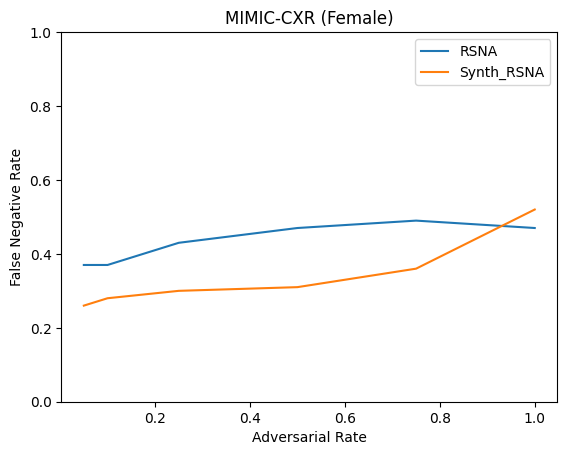

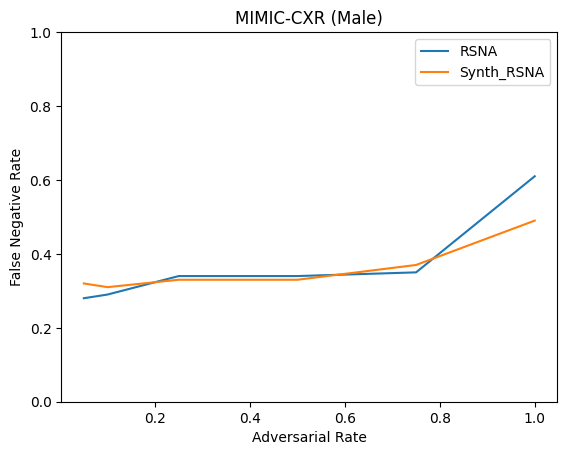

In [40]:
import matplotlib.pyplot as plt
model = "mimic"

group = "Female"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.39, 0.52, 0.47, 0.41, 0.62, 0.63]
rsna_values = [0.37, 0.37, 0.43, 0.47, 0.49, 0.47] 
synth_values = [0.26, 0.28, 0.3, 0.31, 0.36, 0.52]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, synth_baseline, label = "Synth_Baseline")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group})")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "Male"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.4, 0.35, 0.41, 0.39, 0.52, 0.66]
rsna_values = [0.28, 0.29, 0.34, 0.34, 0.35, 0.61] 
synth_values = [0.32, 0.31, 0.33, 0.33, 0.37, 0.49]

# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group})")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

In [39]:
import numpy as np
import pandas as pd

target = '0-20'
target_sex = "M"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'mimic_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    #df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed
    df = df[(df['target_sex']==target_sex) & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex']==target_sex) & (df['dem_age'].isna())]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 80+ FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

5 %
overall FNR:  0.3
Age 80+ FNR:  0.28  +/-  0.04
10 %
overall FNR:  0.31
Age 80+ FNR:  0.29  +/-  0.04
25 %
overall FNR:  0.34
Age 80+ FNR:  0.34  +/-  0.05
50 %
overall FNR:  0.33
Age 80+ FNR:  0.34  +/-  0.05
75 %
overall FNR:  0.32
Age 80+ FNR:  0.35  +/-  0.03
100 %
overall FNR:  0.42
Age 80+ FNR:  0.61  +/-  0.23
Baseline:  [0.3, 0.31, 0.34, 0.33, 0.32, 0.42]
RSNA:  [0.28, 0.29, 0.34, 0.34, 0.35, 0.61] 



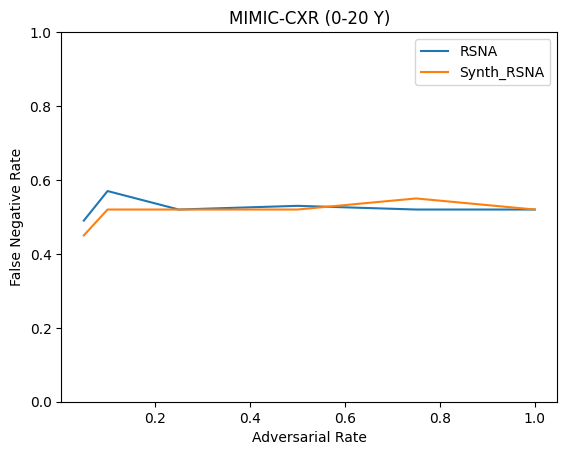

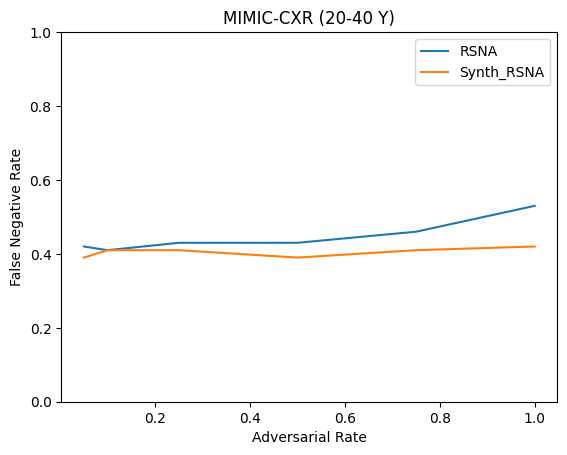

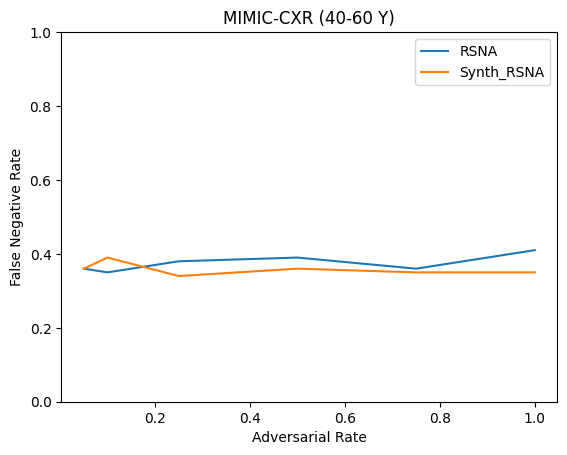

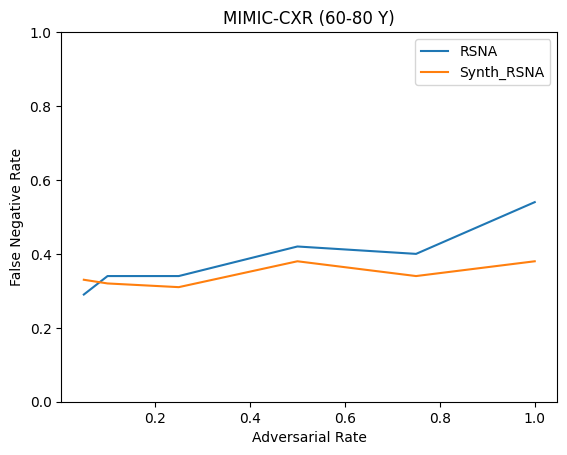

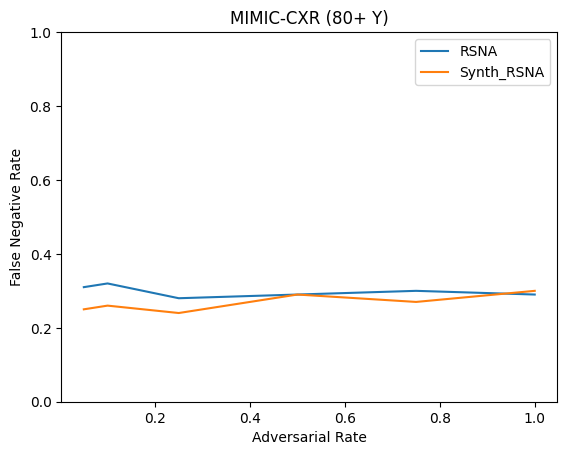

In [56]:
model = "mimic"

group = "0-20"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.45, 0.46, 0.52, 0.52, 0.5, 0.49]
rsna_values = [0.49, 0.57, 0.52, 0.53, 0.52, 0.52] 
synth_values = [0.45, 0.52, 0.52, 0.52, 0.55, 0.52]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "20-40"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.5, 0.44, 0.49, 0.56, 0.55, 0.49]
rsna_values = [0.42, 0.41, 0.43, 0.43, 0.46, 0.53] 
synth_values = [0.39, 0.41, 0.41, 0.39, 0.41, 0.42]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "40-60"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.48, 0.45, 0.49, 0.46, 0.42, 0.51]
rsna_values = [0.36, 0.35, 0.38, 0.39, 0.36, 0.41]
synth_values = [0.36, 0.39, 0.34, 0.36, 0.35, 0.35]  

# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "60-80"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.51, 0.44, 0.47, 0.45, 0.48, 0.49]
rsna_values = [0.29, 0.34, 0.34, 0.42, 0.4, 0.54]  
synth_values = [0.33, 0.32, 0.31, 0.38, 0.34, 0.38]  


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "80+"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00]
overall = [0.53, 0.49, 0.41, 0.43, 0.51, 0.46]
rsna_values = [0.31, 0.32, 0.28, 0.29, 0.3, 0.29] 
synth_values = [0.25, 0.26, 0.24, 0.29, 0.27, 0.3]  


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"MIMIC-CXR ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

In [55]:
import numpy as np
import pandas as pd

target = '0-20'
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_mimic_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == target)]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print(f"Age {target} FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

5 %
overall FNR:  0.33
Age 0-20 FNR:  0.45  +/-  0.07
10 %
overall FNR:  0.32
Age 0-20 FNR:  0.52  +/-  0.11
25 %
overall FNR:  0.3
Age 0-20 FNR:  0.52  +/-  0.04
50 %
overall FNR:  0.28
Age 0-20 FNR:  0.52  +/-  0.03
75 %
overall FNR:  0.31
Age 0-20 FNR:  0.55  +/-  0.03
100 %
overall FNR:  0.34
Age 0-20 FNR:  0.52  +/-  0.08
Baseline:  [0.33, 0.32, 0.3, 0.28, 0.31, 0.34]
RSNA:  [0.45, 0.52, 0.52, 0.52, 0.55, 0.52] 



# Create CheXpert Figures

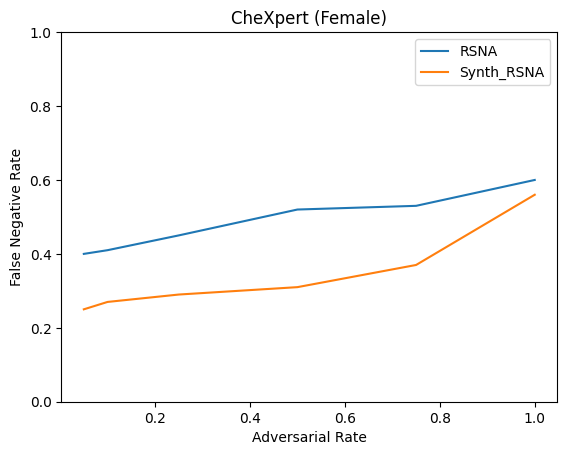

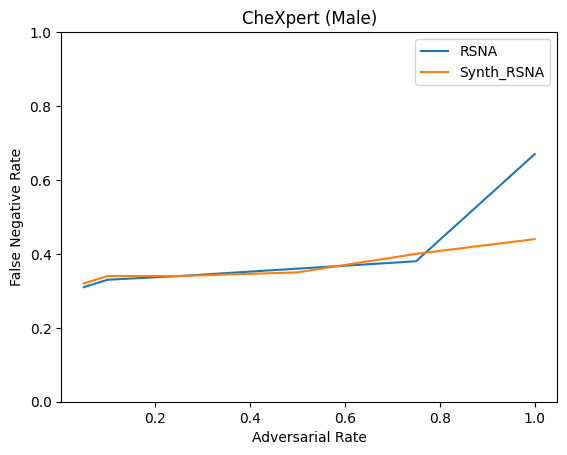

In [58]:
import matplotlib.pyplot as plt
model = "cxpt"

group = "Female"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.39, 0.52, 0.47, 0.41, 0.62, 0.63]
rsna_values = [0.4, 0.41, 0.45, 0.52, 0.53, 0.6]
synth_values = [0.25, 0.27, 0.29, 0.31, 0.37, 0.56]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group})")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "Male"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.4, 0.35, 0.41, 0.39, 0.52, 0.66]
rsna_values = [0.31, 0.33, 0.34, 0.36, 0.38, 0.67] 
synth_values = [0.32, 0.34, 0.34, 0.35, 0.4, 0.44] 

# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group})")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

In [60]:
import numpy as np

target = '0-20'
target_sex = "F"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'cxpt_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    #df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed
    df = df[(df['target_sex']==target_sex) & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex']==target_sex) & (df['dem_age'].isna())]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 80+ FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

5 %
overall FNR:  0.36
Age 80+ FNR:  0.4  +/-  0.04
10 %
overall FNR:  0.35
Age 80+ FNR:  0.41  +/-  0.03
25 %
overall FNR:  0.4
Age 80+ FNR:  0.45  +/-  0.08
50 %
overall FNR:  0.41
Age 80+ FNR:  0.52  +/-  0.07
75 %
overall FNR:  0.4
Age 80+ FNR:  0.53  +/-  0.07
100 %
overall FNR:  0.4
Age 80+ FNR:  0.6  +/-  0.05
Baseline:  [0.36, 0.35, 0.4, 0.41, 0.4, 0.4]
RSNA:  [0.4, 0.41, 0.45, 0.52, 0.53, 0.6] 



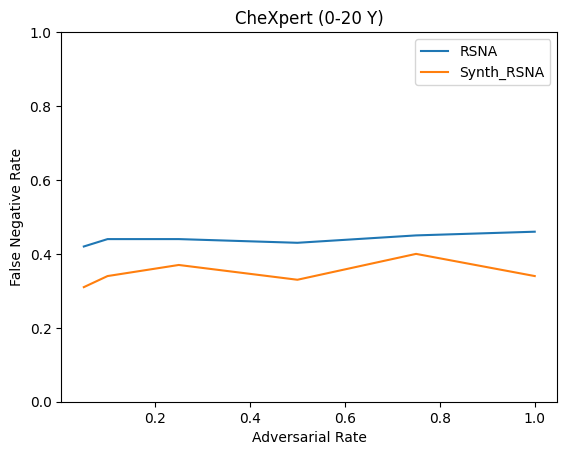

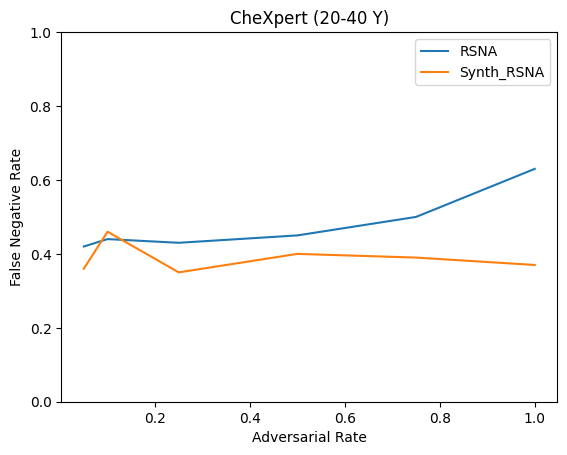

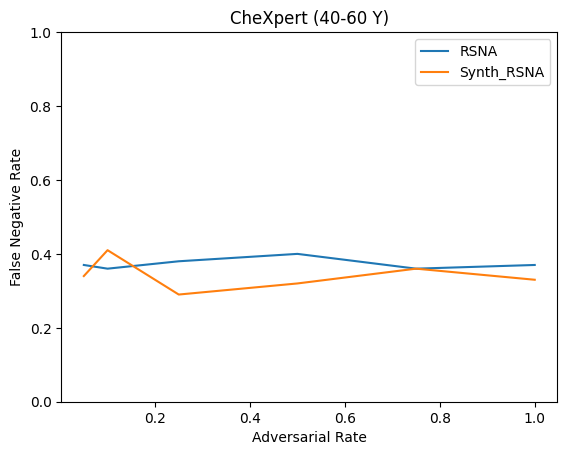

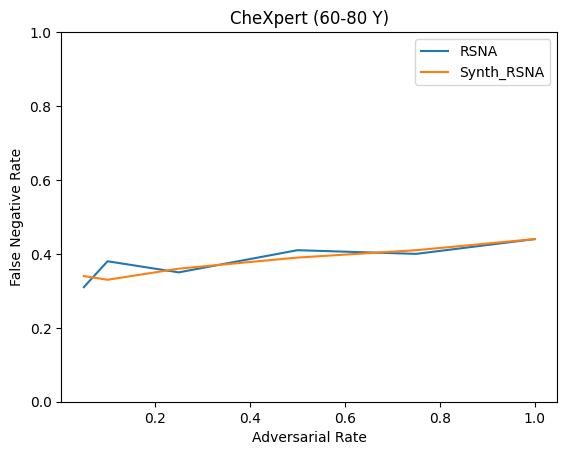

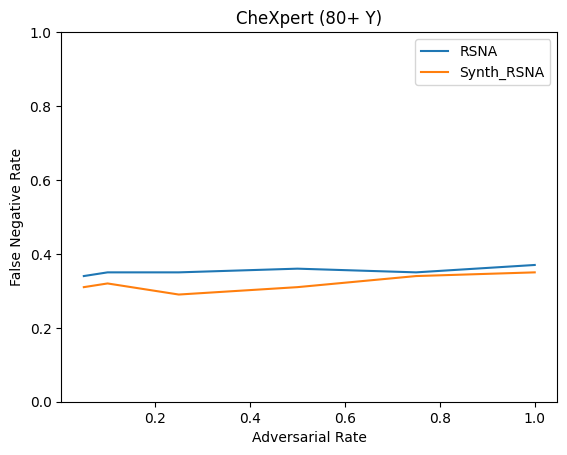

In [154]:
model = "cxpt"

group = "0-20"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.45, 0.46, 0.52, 0.52, 0.5, 0.49]
rsna_values = [0.42, 0.44, 0.44, 0.43, 0.45, 0.46] 
synth_values = [0.31, 0.34, 0.37, 0.33, 0.4, 0.34]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "20-40"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.5, 0.44, 0.49, 0.56, 0.55, 0.49]
rsna_values = [0.42, 0.44, 0.43, 0.45, 0.5, 0.63] 
synth_values = [0.36, 0.46, 0.35, 0.4, 0.39, 0.37]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "40-60"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.48, 0.45, 0.49, 0.46, 0.42, 0.51]
rsna_values = [0.37, 0.36, 0.38, 0.4, 0.36, 0.37]
synth_values = [0.34, 0.41, 0.29, 0.32, 0.36, 0.33]  

# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "60-80"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.51, 0.44, 0.47, 0.45, 0.48, 0.49]
rsna_values = [0.31, 0.38, 0.35, 0.41, 0.4, 0.44] 
synth_values = [0.34, 0.33, 0.36, 0.39, 0.41, 0.44] 


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

group = "80+"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00]
overall = [0.53, 0.49, 0.41, 0.43, 0.51, 0.46]
rsna_values = [0.34, 0.35, 0.35, 0.36, 0.35, 0.37] 
synth_values = [0.31, 0.32, 0.29, 0.31, 0.34, 0.35]  


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"CheXpert ({group} Y)")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

In [3]:
import numpy as np
import pandas as pd

target = '0-20'
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'cxpt_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == target)]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print(f"Age {target} FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

5 %
overall FNR:  0.36
Age 0-20 FNR:  0.42  +/-  0.05
10 %
overall FNR:  0.35
Age 0-20 FNR:  0.44  +/-  0.03
25 %
overall FNR:  0.37
Age 0-20 FNR:  0.44  +/-  0.04
50 %
overall FNR:  0.34
Age 0-20 FNR:  0.43  +/-  0.07
75 %
overall FNR:  0.35
Age 0-20 FNR:  0.45  +/-  0.04
100 %
overall FNR:  0.36
Age 0-20 FNR:  0.46  +/-  0.03
Baseline:  [0.36, 0.35, 0.37, 0.34, 0.35, 0.36]
RSNA:  [0.42, 0.44, 0.44, 0.43, 0.45, 0.46] 



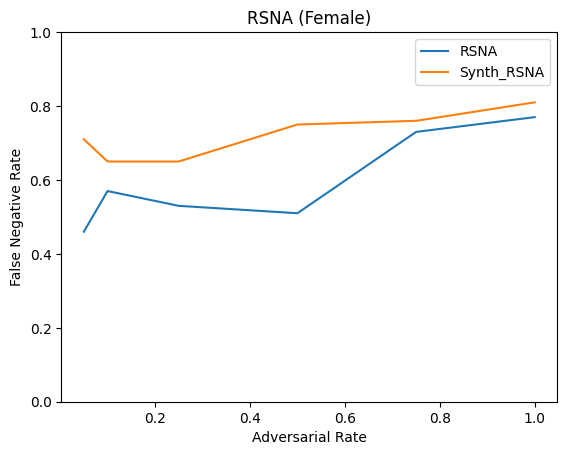

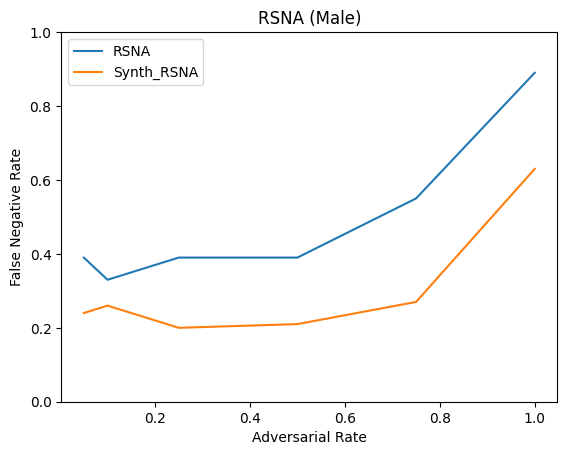

In [128]:
import matplotlib.pyplot as plt

group = "Female"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.39, 0.52, 0.47, 0.41, 0.62, 0.63]
rsna_values = [0.46, 0.57, 0.53, 0.51, 0.73, 0.77] 
synth_values = [0.71, 0.65, 0.65, 0.75, 0.76, 0.81] 


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"RSNA ({group})")
plt.show()  # display
plt.savefig(f"Figures/cxpt/{model}_{group}.png")

group = "Male"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
overall = [0.4, 0.35, 0.41, 0.39, 0.52, 0.66]
rsna_values = [0.39, 0.33, 0.39, 0.39, 0.55, 0.89] 
synth_values = [0.24, 0.26, 0.20, 0.21, 0.27, 0.63]

# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
# plt.plot(rate, overall, label = "Baseline")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.legend()
plt.title(f"RSNA ({group})")
plt.savefig(f"Figures/{model}/{model}_{group}.png")
plt.show()  # display

# Create RSNA Figures

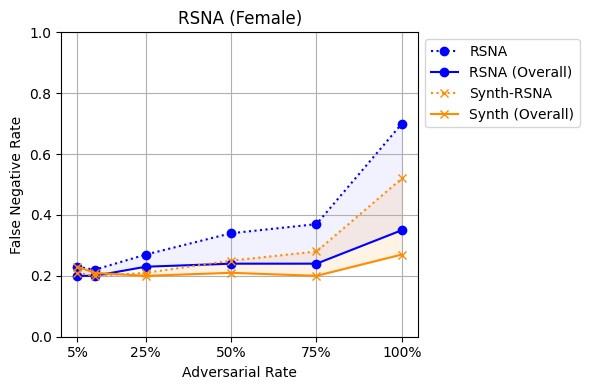

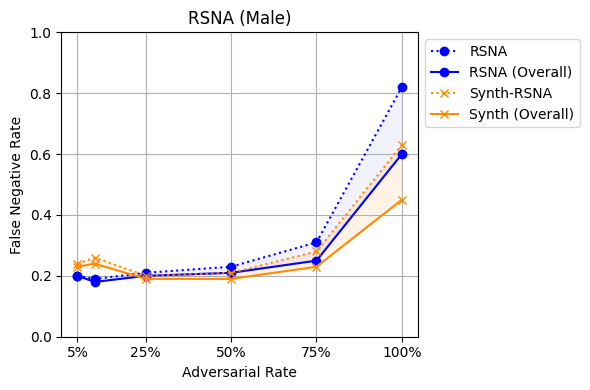

In [61]:
import matplotlib.pyplot as plt

group = "Female"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
rsna_overall = [0.2, 0.2, 0.23, 0.24, 0.24, 0.35]
rsna_values = [0.23, 0.22, 0.27, 0.34, 0.37, 0.7] 
synth_overall = [0.23, 0.21, 0.2, 0.21, 0.2, 0.27] 
synth_values = [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]

# Create figure with adjusted layout
plt.figure(figsize=(6, 4))

# Plot lines
plt.plot(rate, rsna_values, label="RSNA", color='blue', linestyle='dotted', marker='o')
plt.plot(rate, rsna_overall, label="RSNA (Overall)", color='blue', marker='o')
plt.plot(rate, synth_values, label="Synth-RSNA", color='darkorange', linestyle='dotted', marker='x')
plt.plot(rate, synth_overall, label="Synth (Overall)", color='darkorange', marker='x')

# Fill the area between synth_values and synth_baseline
plt.fill_between(rate, rsna_overall, rsna_values, color='blue', alpha=0.05)
plt.fill_between(rate, synth_overall, synth_values, color='darkorange', alpha=0.1)

# Labels and title
plt.ylabel('False Negative Rate')
plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00)
plt.title(f"RSNA ({group})")

# Custom x-axis labels
plt.xticks([0.05, 0.25, 0.5, 0.75, 1.00], ['5%', '25%', '50%', '75%', '100%'])

# Move legend outside
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 1, 1])
plt.grid()
# Save and display
plt.savefig(f"Figures/{model}/{model}_{group}.png", bbox_inches='tight')
plt.show()



group = "Male"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
rsna_overall = [0.2, 0.18, 0.2, 0.21, 0.25, 0.6]
rsna_values = [0.2, 0.19, 0.21, 0.23, 0.31, 0.82] 
synth_overall = [0.23, 0.24, 0.19, 0.19, 0.23, 0.45] 
synth_values = [0.24, 0.26, 0.2, 0.21, 0.28, 0.63]

# Create figure with adjusted layout
plt.figure(figsize=(6, 4))

# Plot lines
plt.plot(rate, rsna_values, label="RSNA", color='blue', linestyle='dotted', marker='o')
plt.plot(rate, overall, label="RSNA (Overall)", color='blue', marker='o')
plt.plot(rate, synth_values, label="Synth-RSNA", color='darkorange', linestyle='dotted', marker='x')
plt.plot(rate, synth_baseline, label="Synth (Overall)", color='darkorange', marker='x')

# Fill the area between synth_values and synth_baseline
plt.fill_between(rate, rsna_overall, rsna_values, color='blue', alpha=0.05)
plt.fill_between(rate, synth_overall, synth_values, color='darkorange', alpha=0.1)

# Labels and title
plt.ylabel('False Negative Rate')
plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00)
plt.title(f"RSNA ({group})")

# Custom x-axis labels
plt.xticks([0.05, 0.25, 0.5, 0.75, 1.00], ['5%', '25%', '50%', '75%', '100%'])

# Move legend outside
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 1, 1])
plt.grid()
# Save and display
plt.savefig(f"Figures/{model}/{model}_{group}.png", bbox_inches='tight')
plt.show()

Processing: Male


/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_1

[0.2, 0.19, 0.21, 0.23, 0.31, 0.82] [0.24, 0.26, 0.2, 0.21, 0.28, 0.63]


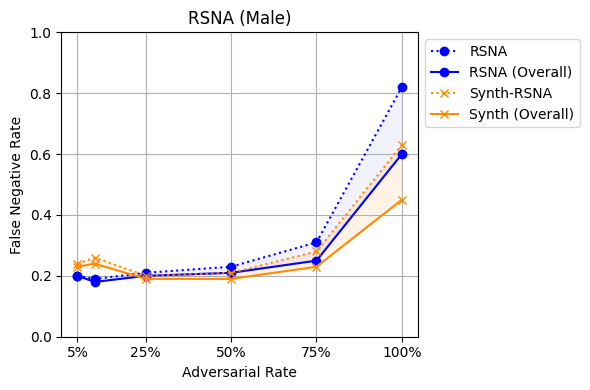

Saved plot for Male at Figures/rsna/rsna_Male.png
Processing: Female


/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
/tmp/ipykernel_1

[0.23, 0.22, 0.27, 0.34, 0.37, 0.7] [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


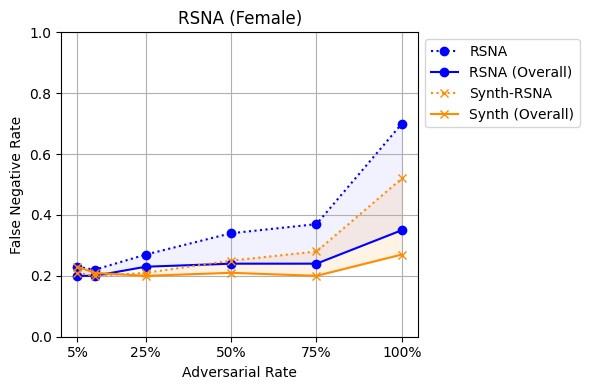

Saved plot for Female at Figures/rsna/rsna_Female.png
Processing: 0-20 Y


/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_1

[0.11, 0.13, 0.16, 0.21, 0.28, 0.52] [0.09, 0.1, 0.11, 0.18, 0.25, 0.38]


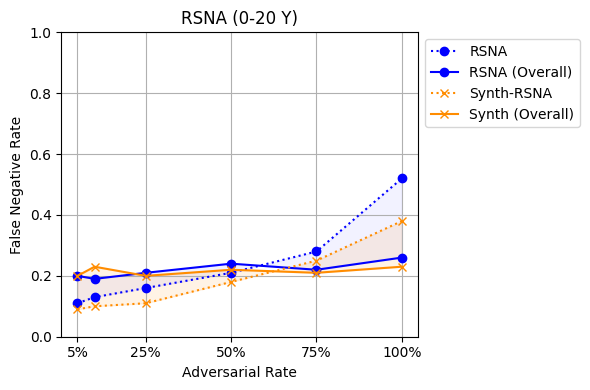

Saved plot for 0-20 Y at Figures/rsna/rsna_0-20 Y.png
Processing: 20-40 Y
[0.21, 0.22, 0.22, 0.21, 0.24, 0.33] [0.19, 0.22, 0.22, 0.19, 0.23, 0.27]


/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_1

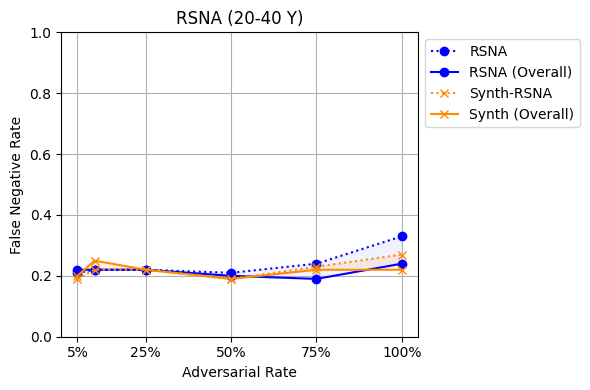

Saved plot for 20-40 Y at Figures/rsna/rsna_20-40 Y.png
Processing: 40-60 Y
[0.25, 0.21, 0.24, 0.23, 0.25, 0.28] [0.21, 0.24, 0.21, 0.25, 0.21, 0.25]


/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_1

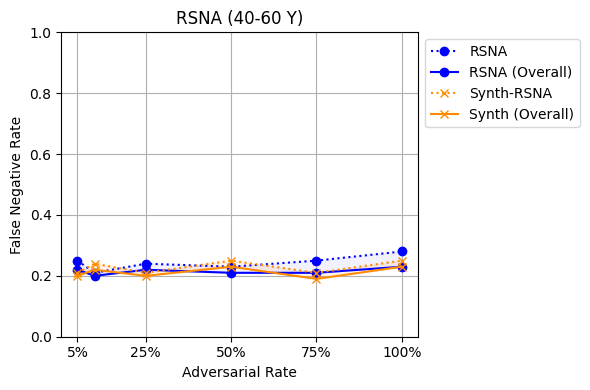

Saved plot for 40-60 Y at Figures/rsna/rsna_40-60 Y.png
Processing: 60-80 Y
[0.25, 0.27, 0.25, 0.27, 0.32, 0.44] [0.24, 0.26, 0.31, 0.3, 0.33, 0.37]


/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_1

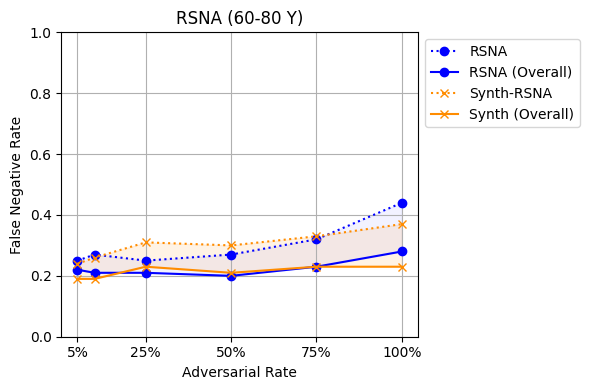

Saved plot for 60-80 Y at Figures/rsna/rsna_60-80 Y.png
Processing: 80+ Y
[0.27, 0.13, 0.22, 0.28, 0.2, 0.28] [0.23, 0.17, 0.23, 0.25, 0.17, 0.17]


/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_100063/749158021.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
/tmp/ipykernel_1

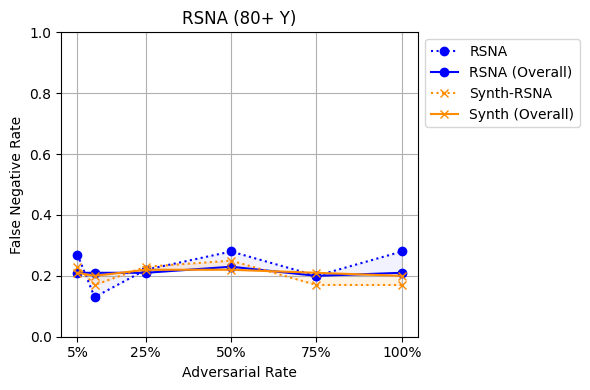

Saved plot for 80+ Y at Figures/rsna/rsna_80+ Y.png
All plots generated successfully!


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
output_dir = "Figures"
os.makedirs(output_dir, exist_ok=True)

# Define demographic groups
groups = {
    "Male": {"target_sex": "M", "target_age": None},
    "Female": {"target_sex": "F", "target_age": None},
    "0-20 Y": {"target_sex": None, "target_age": "0-20"},
    "20-40 Y": {"target_sex": None, "target_age": "20-40"},
    "40-60 Y": {"target_sex": None, "target_age": "40-60"},
    "60-80 Y": {"target_sex": None, "target_age": "60-80"},
    "80+ Y": {"target_sex": None, "target_age": "80+"},
}

rates = [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]

def get_average_fnr(df, target_sex, target_age, rate):
    """Computes the average FNR for a given demographic group and adversarial rate."""
    filtered_df = df[(df['rate'] == rate)]
    
    if target_sex:
        filtered_df = filtered_df[(filtered_df['target_sex'] == target_sex) & (filtered_df['target_age'].isna()) & (df['rate'] == rate)]
    elif target_age:
        filtered_df = filtered_df[(filtered_df['target_sex'].isna()) & (filtered_df['target_age'] == target_age) & (df['rate'] == rate)]
    
    # Extract baseline (Overall FNR)
    baseline = filtered_df[(filtered_df['dem_sex'].isna()) & (filtered_df['dem_age'].isna())]
    if target_sex:
        dem_subset = filtered_df[(filtered_df['dem_sex'] == target_sex) & (filtered_df['dem_age'].isna())]
    elif target_age:
        dem_subset = filtered_df[(filtered_df['dem_sex'].isna()) & (filtered_df['dem_age'] == target_age)]
        
    num_trials = 5
    dem_fnr_sum, overall_fnr_sum = 0, 0
    dem_fnr_vals = []
    
    for i in range(num_trials):
        dem_fnr_sum += dem_subset.iloc[i]['fnr']
        dem_fnr_vals.append(dem_subset.iloc[i]['fnr'])
        overall_fnr_sum += baseline.iloc[i]['fnr']
    
    dem_fnr_avg = round(dem_fnr_sum / num_trials, 2)
    overall_fnr_avg = round(overall_fnr_sum / num_trials, 2)
    std_dev = round(np.std(dem_fnr_vals), 2)
    
    return overall_fnr_avg, dem_fnr_avg, std_dev

# Process each group and generate plots
for group, params in groups.items():
    print(f"Processing: {group}")

    # Read RSNA dataset
    rsna_df = pd.read_csv("rsna_summary.csv")
    rsna_overall, rsna_values, rsna_std = [], [], []

    for rate in rates:
        overall, fnr, std = get_average_fnr(rsna_df, params["target_sex"], params["target_age"], rate)
        rsna_overall.append(overall)
        rsna_values.append(fnr)
        rsna_std.append(std)

    # Read Synth-RSNA dataset
    synth_df = pd.read_csv("augmented_rsna_summary.csv")
    synth_overall, synth_values, synth_std = [], [], []

    for rate in rates:
        overall, fnr, std = get_average_fnr(synth_df, params["target_sex"], params["target_age"], rate)
        synth_overall.append(overall)
        synth_values.append(fnr)
        synth_std.append(std)
        
    print(rsna_values, synth_values)

    # Create plot
    plt.figure(figsize=(6, 4))

    # Plot RSNA data
    plt.plot(rates, rsna_values, label="RSNA", color='blue', linestyle='dotted', marker='o')
    plt.plot(rates, rsna_overall, label="RSNA (Overall)", color='blue', marker='o')

    # Plot Synth-RSNA data
    plt.plot(rates, synth_values, label="Synth-RSNA", color='darkorange', linestyle='dotted', marker='x')
    plt.plot(rates, synth_overall, label="Synth (Overall)", color='darkorange', marker='x')

    # Fill areas between overall and subgroup
    plt.fill_between(rates, rsna_overall, rsna_values, color='blue', alpha=0.05)
    plt.fill_between(rates, synth_overall, synth_values, color='darkorange', alpha=0.1)

    # Labels and title
    plt.ylabel('False Negative Rate')
    plt.xlabel('Adversarial Rate')
    plt.ylim(0, 1.00)
    plt.title(f"RSNA ({group})")

    # Custom x-axis labels
    plt.xticks([0.05, 0.25, 0.5, 0.75, 1.00], ['5%', '25%', '50%', '75%', '100%'])

    # Move legend outside
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Adjust layout to make space for legend
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.grid()

    # Save figure
    save_path = os.path.join(output_dir, f"{model}/rsna_{group}.png")
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

    print(f"Saved plot for {group} at {save_path}")

print("All plots generated successfully!")


In [72]:
import numpy as np
import pandas as pd

target = '0-20'
target_sex = "F"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex']==target_sex) & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex']==target_sex) & (df['dem_age'].isna())]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)
    
    return overall_fnr, dem0_20_fnr, demSTD # return overall, values, and STD
    

    
# get FNR summary
synth_overall, synth_values, std_vals = [], [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall, fnr, STD = get_average_fnr(idx)
    std_vals.append(STD)
    synth_overall.append(overall); synth_values.append(fnr);
print("synth_overall: ", synth_overall)
print("synth_values: ", synth_values)

synth_overall:  [0.23, 0.21, 0.2, 0.21, 0.2, 0.27]
synth_values:  [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


In [70]:
import numpy as np
import pandas as pd

target = '0-20'
target_sex = "F"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex']==target_sex) & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex']==target_sex) & (df['dem_age'].isna())]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)
    
    return overall_fnr, dem0_20_fnr, demSTD # return overall, values, and STD
    

    
# get FNR summary
rsna_overall, rsna_values, std_vals = [], [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall, fnr, STD = get_average_fnr(idx)
    std_vals.append(STD)
    rsna_overall.append(overall); rsna_values.append(fnr);
print("rsna_overall: ", rsna_overall)
print("rsna_values: ", rsna_values)

rsna_overall:  [0.2, 0.2, 0.23, 0.24, 0.24, 0.35]
rsna_values:  [0.23, 0.22, 0.27, 0.34, 0.37, 0.7]


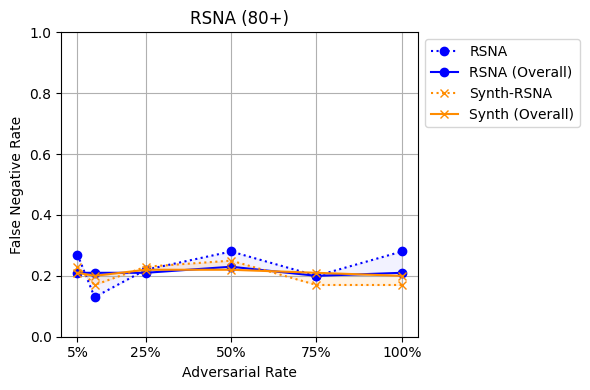

Saved plot for 80+ at Figures/rsna/rsna_80+.png


In [89]:
group = "80+"
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00]
rsna_overall = [0.21, 0.21, 0.21, 0.23, 0.2, 0.21]
rsna_values = [0.27, 0.13, 0.22, 0.28, 0.2, 0.28]
synth_overall = [0.21, 0.2, 0.22, 0.22, 0.21, 0.2]
synth_values =  [0.23, 0.17, 0.23, 0.25, 0.17, 0.17]


# Create plot
plt.figure(figsize=(6, 4))

# Plot RSNA data
plt.plot(rates, rsna_values, label="RSNA", color='blue', linestyle='dotted', marker='o')
plt.plot(rates, rsna_overall, label="RSNA (Overall)", color='blue', marker='o')

# Plot Synth-RSNA data
plt.plot(rates, synth_values, label="Synth-RSNA", color='darkorange', linestyle='dotted', marker='x')
plt.plot(rates, synth_overall, label="Synth (Overall)", color='darkorange', marker='x')

# Fill areas between overall and subgroup
plt.fill_between(rates, rsna_overall, rsna_values, color='blue', alpha=0.05)
plt.fill_between(rates, synth_overall, synth_values, color='darkorange', alpha=0.1)

# Labels and title
plt.ylabel('False Negative Rate')
plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00)
plt.title(f"RSNA ({group})")

# Custom x-axis labels
plt.xticks([0.05, 0.25, 0.5, 0.75, 1.00], ['5%', '25%', '50%', '75%', '100%'])

# Move legend outside
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 1, 1])
plt.grid()

# Save figure
save_path = os.path.join(output_dir, f"{model}/rsna_{group}.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

print(f"Saved plot for {group} at {save_path}")

In [82]:
import numpy as np
import pandas as pd

target_age = '80+'
target_sex = "F"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age']==target_age) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age']==target_age)]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)
    
    return overall_fnr, dem0_20_fnr, demSTD # return overall, values, and STD
    

    
# get FNR summary
synth_overall, synth_values, std_vals = [], [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall, fnr, STD = get_average_fnr(idx)
    std_vals.append(STD)
    synth_overall.append(overall); synth_values.append(fnr);
print("synth_overall: ", synth_overall)
print("synth_values: ", synth_values)

synth_overall:  [0.21, 0.21, 0.21, 0.23, 0.2, 0.21]
synth_values:  [0.27, 0.13, 0.22, 0.28, 0.2, 0.28]


# Evaluating individual models 

In [2]:
import os
import pandas as pd

In [6]:
rsna_csv = 'augmented_rsna_summary.csv'
df = pd.DataFrame(pd.read_csv(rsna_csv))
df = df[(df['target_sex']=="M") & (df['target_age'] == '40-60') & (df['rate'] == -1) & (df['trial'] == 0)] # performance on females with no labels changed
df

,target_sex,target_age,trial,rate,dem_sex,dem_age,auroc,tpr,fnr,tnr,fpr,ppv,npv,fomr,tn,fp,fn,tp


In [23]:
list(df[df["trial"] == 0]['fnr'])[0]

0.244195356285028

## Target Age == '80+'

In [3]:
# Overall
baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
dem0_20 = df[(df['dem_age'] == '80+') & (df['dem_sex'].isna())]

print("overall FNR: ", baseline.iloc[0]['fnr'])
print("0.05 FNR: ",dem0_20.iloc[0]['fnr'])

NameError: name 'df' is not defined

In [28]:
# evaluate random rsna
import numpy as np

target_age = '40-60'
target_sex = "M"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'random_rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'] == "M") & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    age = df[(df['dem_sex'].isna()) & (df['dem_age'] == target_age)]
    sex = df[(df['dem_sex'] == target_sex) & (df['dem_age'].isna())]
    sexage = df[(df['dem_sex'] == target_sex) & (df['dem_age'] == target_age)]

    num_trials = 5
    sex_sum, age_sum, sexage_sum = 0,0,0
    overall_sum = 0
    sex_vals, age_vals, sexage_vals = [], [], []
    # get average female
    for i in range(num_trials):
        sex_sum += list(sex[sex["trial"] == i]['fnr'])[0]
        age_sum += list(age[age["trial"] == i]['fnr'])[0]
        sexage_sum += list(sexage[sexage["trial"] == i]['fnr'])[0]
        overall_sum += list(baseline[baseline["trial"] == i]['fnr'])[0]
        
        sex_vals.append(sex.iloc[i]['fnr'])
        age_vals.append(age.iloc[i]['fnr'])
        sexage_vals.append(sexage.iloc[i]['fnr'])
        
    sex_fnr = round(sex_sum/num_trials,2); sexSTD = round(np.std(sex_vals), 2)
    age_fnr = round(age_sum/num_trials,2); ageSTD = round(np.std(age_vals), 2)
    sexage_fnr = round(sexage_sum/num_trials,2); sexageSTD = round(np.std(sexage_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print(f"Age {target_age} FNR: {age_fnr}; +/- {ageSTD}")
    print(f"sex {target_sex} FNR: {sex_fnr}; +/- {sexSTD}")
    print(f"Sex & Age {target_sex} || {target_age} FNR: {sexage_fnr}; +/- {sexageSTD}")
    return overall_fnr, sex_fnr, age_fnr, sexage_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [-1]:
    overall_fnr, sex_fnr, age_fnr, sexage_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
    print('\n\n')

-100 %
overall FNR:  0.23
Age 40-60 FNR: 0.25; +/- 0.06
sex M FNR: 0.25; +/- 0.06
Sex & Age M || 40-60 FNR: 0.26; +/- 0.07





In [43]:
import numpy as np

target = '0-20'
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_cxpt_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == target)]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 80+ FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

5 %
overall FNR:  0.69
Age 80+ FNR:  0.79  +/-  0.0
10 %
overall FNR:  0.69
Age 80+ FNR:  0.75  +/-  0.0
25 %
overall FNR:  0.71
Age 80+ FNR:  0.77  +/-  0.0
50 %
overall FNR:  0.7
Age 80+ FNR:  0.73  +/-  0.0
75 %
overall FNR:  0.74
Age 80+ FNR:  0.79  +/-  0.0
100 %
overall FNR:  0.69
Age 80+ FNR:  0.72  +/-  0.0
Baseline:  [0.69, 0.69, 0.71, 0.7, 0.74, 0.69]
RSNA:  [0.79, 0.75, 0.77, 0.73, 0.79, 0.72] 



In [1]:
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == '80+') & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == '80+')]

    num_trials, dem0_20_sum = 4, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 0-20 FNR: ",dem0_20_fnr)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(i)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
    print('\n\n')

NameError: name 'pd' is not defined

In [81]:
import numpy as np

target = '0-20'
target_sex = "M"
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_cxpt_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    #df = df[(df['target_sex'].isna()) & (df['target_age'] == target) & (df['rate'] == rate)] # performance on females with no labels changed
    df = df[(df['target_sex']==target_sex) & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed
    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex']==target_sex) & (df['dem_age'].isna())]

    num_trials, dem0_20_sum = 2, 0
    overall_sum = 0
    dem_vals = []
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        dem_vals.append(dem0_20.iloc[i]['fnr'])
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2); demSTD = round(np.std(dem_vals), 2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 80+ FNR: ",dem0_20_fnr, " +/- ", demSTD)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for idx in [0.05, 0.10, 0.25, 0.50, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(idx)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
print("Baseline: ", synth_overall)
print("RSNA: ", synth0_20, "\n")

IndexError: single positional indexer is out-of-bounds

## Target Age == '0-20'

In [9]:
# Overall
baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
dem0_20 = df[(df['dem_age'] == '0-20') & (df['dem_sex'].isna())]

print("overall FNR: ", baseline.iloc[0]['fnr'])
print("0.05 FNR: ",dem0_20.iloc[0]['fnr'])

overall FNR:  0.2321857485988791
0.05 FNR:  0.0933333333333333


In [10]:
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == '0-20') & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == '0-20')]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 0-20 FNR: ",dem0_20_fnr)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(i)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
    print('\n\n')

5 %
overall FNR:  0.18
Age 0-20 FNR:  0.12



10 %
overall FNR:  0.21
Age 0-20 FNR:  0.12



25 %
overall FNR:  0.22
Age 0-20 FNR:  0.14



50 %
overall FNR:  0.21
Age 0-20 FNR:  0.17



75 %
overall FNR:  0.19
Age 0-20 FNR:  0.24



100 %
overall FNR:  0.26
Age 0-20 FNR:  0.55





In [11]:
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'].isna()) & (df['target_age'] == '0-20') & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    dem0_20 = df[(df['dem_sex'].isna()) & (df['dem_age'] == '0-20')]

    num_trials, dem0_20_sum = 5, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        dem0_20_sum += dem0_20.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    dem0_20_fnr = round(dem0_20_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("Age 0-20 FNR: ",dem0_20_fnr)
    return overall_fnr, dem0_20_fnr
    

    
# get FNR summary
synth_overall, synth0_20 = [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, demo0_20_fnr = get_average_fnr(i)
    synth_overall.append(overall_fnr); synth0_20.append(demo0_20_fnr);
    print('\n\n')

5 %
overall FNR:  0.2
Age 0-20 FNR:  0.09



10 %
overall FNR:  0.23
Age 0-20 FNR:  0.1



25 %
overall FNR:  0.2
Age 0-20 FNR:  0.11



50 %
overall FNR:  0.22
Age 0-20 FNR:  0.19



75 %
overall FNR:  0.21
Age 0-20 FNR:  0.25



100 %
overall FNR:  0.23
Age 0-20 FNR:  0.38





## No adversarial attack; rate = 0

In [4]:
rsna_csv = 'rsna_summary.csv'
df = pd.DataFrame(pd.read_csv(rsna_csv))
df = df[(df['target_sex'].isna()) & (df['target_age'] == '0-20') & (df['rate'] == 0.05) & (df['trial'] == 0)] # performance on females with no labels changed
df

,target_sex,target_age,trial,rate,dem_sex,dem_age,auroc,tpr,fnr,tnr,fpr,ppv,npv,fomr,tn,fp,fn,tp
540,NaN,0-20,0,0.05,NaN,NaN,0.840037,0.783026,0.216974,0.750410,0.249590,0.478474,0.922037,0.077963,3205,1066,271,978
541,NaN,0-20,0,0.05,M,NaN,0.836022,0.787129,0.212871,0.735354,0.264646,0.496100,0.912557,0.087443,1795,646,172,636
542,NaN,0-20,0,0.05,F,NaN,0.843588,0.775510,0.224490,0.770492,0.229508,0.448819,0.934394,0.065606,1410,420,99,342
543,NaN,0-20,0,0.05,NaN,0-20,0.887887,0.920000,0.080000,0.705660,0.294340,0.638889,0.939698,0.060302,187,78,12,138
544,NaN,0-20,0,0.05,NaN,20-40,0.848070,0.791005,0.208995,0.756609,0.243391,0.528269,0.913091,0.086909,830,267,79,299
545,NaN,0-20,0,0.05,NaN,40-60,0.834090,0.759382,0.240618,0.767838,0.232162,0.441026,0.929723,0.070277,1442,436,109,344
546,NaN,0-20,0,0.05,NaN,60-80,0.805994,0.730469,0.269531,0.728097,0.271903,0.409190,0.912879,0.087121,723,270,69,187
547,NaN,0-20,0,0.05,NaN,80+,0.769737,0.833333,0.166667,0.605263,0.394737,0.400000,0.920000,0.080000,23,15,2,10
548,NaN,0-20,0,0.05,M,0-20,0.881866,0.925234,0.074766,0.672515,0.327485,0.638710,0.934959,0.065041,115,56,8,99
549,NaN,0-20,0,0.05,M,20-40,0.841111,0.789062,0.210938,0.736755,0.263245,0.559557,0.891784,0.108216,445,159,54,202


In [2]:
rsna_csv = 'rsna_summary.csv'
df = pd.DataFrame(pd.read_csv(rsna_csv))
df = df[(df['target_sex'] == 'F') & (df['target_age'].isna()) & (df['rate'] == 0.0) & (df['trial'] == 0)] # performance on females with no labels changed
df

,target_sex,target_age,trial,rate,dem_sex,dem_age,auroc,tpr,fnr,tnr,fpr,ppv,npv,fomr,tn,fp,fn,tp


In [33]:
# Overall
baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
male = df[(df['dem_sex'] == 'M') & (df['dem_age'].isna())]
female = df[(df['dem_sex'] == 'F') & (df['dem_age'].isna())]

print("overall FNR: ", baseline.iloc[0]['fnr'])
print("male FNR: ",male.iloc[0]['fnr'])
print("female FNR: ", female.iloc[0]['fnr'])

overall FNR:  0.1697357886309047
male FNR:  0.1794554455445544
female FNR:  0.1519274376417233


## 50% female labels changed; rate = 0.5

In [7]:
# Get Synth_RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'augmented_rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'] == 'F') & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    male = df[(df['dem_sex'] == 'M') & (df['dem_age'].isna())]
    female = df[(df['dem_sex'] == 'F') & (df['dem_age'].isna())]

    num_trials, female_sum, male_sum = 5, 0, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        female_sum += female.iloc[i]['fnr']
        male_sum += male.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    female_fnr = round(female_sum/num_trials,2)
    male_fnr = round(male_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("male FNR: ",male_fnr)
    print("female FNR: ", female_fnr)
    return overall_fnr, male_fnr, female_fnr
    

    
# get FNR summary
synth_overall, synth_male, synth_female = [], [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, male_fnr, female_fnr = get_average_fnr(i)
    synth_overall.append(overall_fnr); synth_male.append(male_fnr); synth_female.append(female_fnr);
    print('\n\n')

5 %
overall FNR:  0.23
male FNR:  0.24
female FNR:  0.21



10 %
overall FNR:  0.21
male FNR:  0.21
female FNR:  0.2



25 %
overall FNR:  0.2
male FNR:  0.2
female FNR:  0.21



50 %
overall FNR:  0.21
male FNR:  0.19
female FNR:  0.25



75 %
overall FNR:  0.21
male FNR:  0.17
female FNR:  0.28



100 %
overall FNR:  0.27
male FNR:  0.14
female FNR:  0.52





In [61]:
# Get RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'] == 'F') & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    male = df[(df['dem_sex'] == 'M') & (df['dem_age'].isna())]
    female = df[(df['dem_sex'] == 'F') & (df['dem_age'].isna())]

    num_trials, female_sum, male_sum = 5, 0, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        female_sum += female.iloc[i]['fnr']
        male_sum += male.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    female_fnr = round(female_sum/num_trials,2)
    male_fnr = round(male_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("male FNR: ",male_fnr)
    print("female FNR: ", female_fnr)
    return overall_fnr, male_fnr, female_fnr

    
# get FNR summary
rsna_overall, rsna_male, rsna_female = [], [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, male_fnr, female_fnr = get_average_fnr(i)
    rsna_overall.append(overall_fnr); rsna_male.append(male_fnr); rsna_female.append(female_fnr);
    print('\n\n')

5 %
overall FNR:  0.2
male FNR:  0.19
female FNR:  0.22



10 %
overall FNR:  0.21
male FNR:  0.19
female FNR:  0.23



25 %
overall FNR:  0.23
male FNR:  0.21
female FNR:  0.27



50 %
overall FNR:  0.21
male FNR:  0.17
female FNR:  0.29



75 %
overall FNR:  0.21
male FNR:  0.15
female FNR:  0.32



100 %
overall FNR:  0.34
male FNR:  0.16
female FNR:  0.67





In [5]:
# Get RSNA summary
def get_average_fnr(rate=0.5):
    rsna_csv = 'rsna_summary.csv'
    df = pd.DataFrame(pd.read_csv(rsna_csv))
    df = df[(df['target_sex'] == 'F') & (df['target_age'].isna()) & (df['rate'] == rate)] # performance on females with no labels changed

    # Overall
    baseline = df[(df['dem_sex'].isna()) & (df['dem_age'].isna())]
    male = df[(df['dem_sex'] == 'M') & (df['dem_age'].isna())]
    female = df[(df['dem_sex'] == 'F') & (df['dem_age'].isna())]

    num_trials, female_sum, male_sum = 5, 0, 0
    overall_sum = 0
    # get average female
    for i in range(num_trials):
        female_sum += female.iloc[i]['fnr']
        male_sum += male.iloc[i]['fnr']
        overall_sum += baseline.iloc[i]['fnr']
    female_fnr = round(female_sum/num_trials,2)
    male_fnr = round(male_sum/num_trials,2)
    overall_fnr = round(overall_sum/num_trials,2)

    print(int(rate*100), "%")
    print("overall FNR: ", overall_fnr)
    print("male FNR: ",male_fnr)
    print("female FNR: ", female_fnr)
    return overall_fnr, male_fnr, female_fnr

    
# get FNR summary
rsna_overall, rsna_male, rsna_female = [], [], []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]:
    overall_fnr, male_fnr, female_fnr = get_average_fnr(i)
    rsna_overall.append(overall_fnr); rsna_male.append(male_fnr); rsna_female.append(female_fnr);
    print('\n\n')

5 %
overall FNR:  0.2
male FNR:  0.19
female FNR:  0.23



10 %
overall FNR:  0.2
male FNR:  0.18
female FNR:  0.22



25 %
overall FNR:  0.23
male FNR:  0.2
female FNR:  0.27



50 %
overall FNR:  0.24
male FNR:  0.19
female FNR:  0.34



75 %
overall FNR:  0.24
male FNR:  0.17
female FNR:  0.37



100 %
overall FNR:  0.35
male FNR:  0.16
female FNR:  0.7





In [60]:
print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Overall RSNA:       ", rsna_overall)
print("Overall Synth_RSNA: ", synth_overall)

print('\n')

print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Male RSNA:          ", rsna_male)
print("Male Synth_RSNA:    ", synth_male)

print('\n')

print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Female RSNA:        ", rsna_female)
print("Female Synth_RSNA:  ", synth_female)

Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Overall RSNA:        [0.2, 0.21, 0.23, 0.21, 0.21, 0.34]
Overall Synth_RSNA:  [0.23, 0.21, 0.2, 0.21, 0.21, 0.27]


Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Male RSNA:           [0.19, 0.19, 0.21, 0.17, 0.15, 0.16]
Male Synth_RSNA:     [0.24, 0.21, 0.2, 0.19, 0.17, 0.14]


Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Female RSNA:         [0.22, 0.23, 0.27, 0.29, 0.32, 0.67]
Female Synth_RSNA:   [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


In [8]:
print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Overall RSNA:       ", rsna_overall)
print("Overall Synth_RSNA: ", synth_overall)

print('\n')

print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Male RSNA:          ", rsna_male)
print("Male Synth_RSNA:    ", synth_male)

print('\n')

print("Rates:              ", [0.05, 0.1, 0.25, 0.5, 0.75, 1.00])
print("Female RSNA:        ", rsna_female)
print("Female Synth_RSNA:  ", synth_female)

Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Overall RSNA:        [0.2, 0.2, 0.23, 0.24, 0.24, 0.35]
Overall Synth_RSNA:  [0.23, 0.21, 0.2, 0.21, 0.21, 0.27]


Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Male RSNA:           [0.19, 0.18, 0.2, 0.19, 0.17, 0.16]
Male Synth_RSNA:     [0.24, 0.21, 0.2, 0.19, 0.17, 0.14]


Rates:               [0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
Female RSNA:         [0.23, 0.22, 0.27, 0.34, 0.37, 0.7]
Female Synth_RSNA:   [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


## Plot Model Performance

In [38]:
rsna_csv = 'rsna_summary.csv'
df = pd.DataFrame(pd.read_csv(rsna_csv))
rate, male_fnr, female_fnr = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0], [], []
for r in rate:
    new_df = df[(df['target_sex'] == 'F') & (df['target_age'].isna()) & (df['rate'] == r) & (df['trial'] == 0)] # performance on females with no labels changed
    female, male = new_df[(new_df['dem_sex'] == 'F') & (new_df['dem_age'].isna())], new_df[(new_df['dem_sex'] == 'M') & (new_df['dem_age'].isna())]
    female_fnr.append(female.iloc[0]['fnr']); male_fnr.append(male.iloc[0]['fnr'])

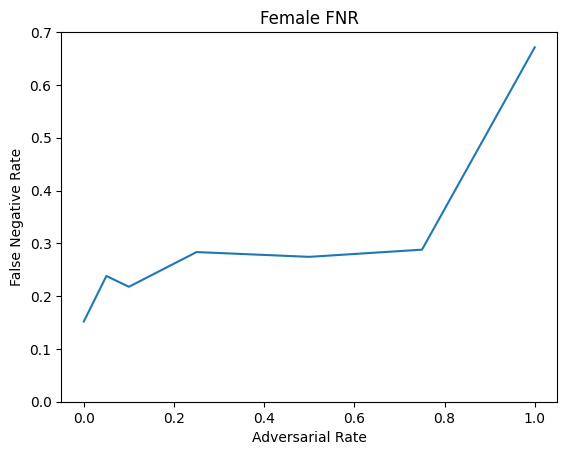

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(rate, female_fnr)  # Plot the chart
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 0.7) 
plt.title("Female FNR")
plt.show()  # display

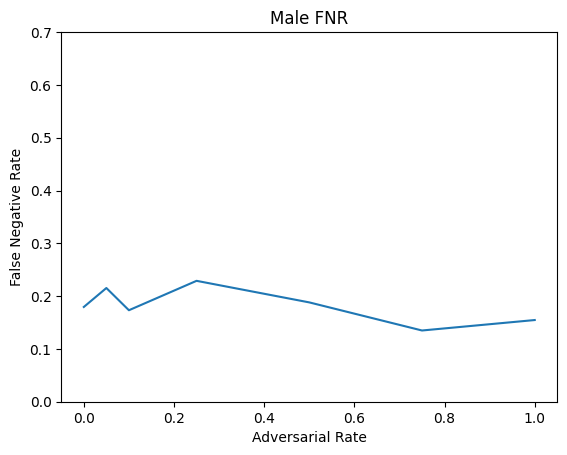

In [57]:
plt.plot(rate,male_fnr)  # Plot the chart
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 0.7) 
plt.title("Male FNR")
plt.show()  # display

## Comparison between RSNA and Synth_RSNA Datasets

In [10]:
import matplotlib.pyplot as plt
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', fontsize=14)

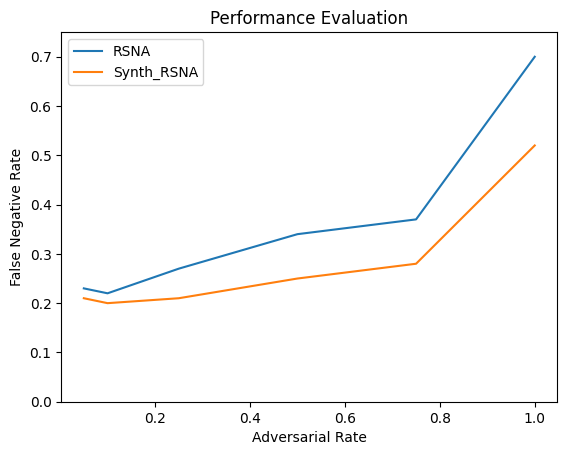

In [12]:
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00] 
rsna_values = [0.23, 0.22, 0.27, 0.34, 0.37, 0.7]
synth_values = [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 0.75) 
plt.legend()
plt.title("Performance Evaluation")
plt.show()  # display

In [ ]:
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00]
rsna_values = [0.22, 0.23, 0.27, 0.29, 0.32, 0.67]
synth_values = [0.21, 0.2, 0.21, 0.25, 0.28, 0.52]


# plot lines
plt.plot(rate, rsna_values, label = "RSNA")
plt.plot(rate, synth_values, label = "Synth_RSNA")
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 0.7) 
plt.legend()
plt.title("Performance Evaluation")
plt.show()  # display

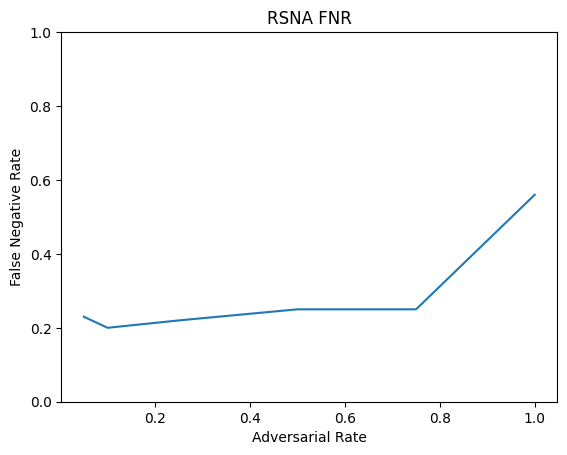

In [12]:
rate = [0.05, 0.10, 0.25, 0.5, 0.75, 1.00]
values = [0.21, 0.20, 0.21, 0.25, 0.25, 0.56]

plt.plot(rate,values)  # Plot the chart
plt.ylabel('False Negative Rate');plt.xlabel('Adversarial Rate')
plt.ylim(0, 1.00) 
plt.title("RSNA FNR")
plt.show()  # display

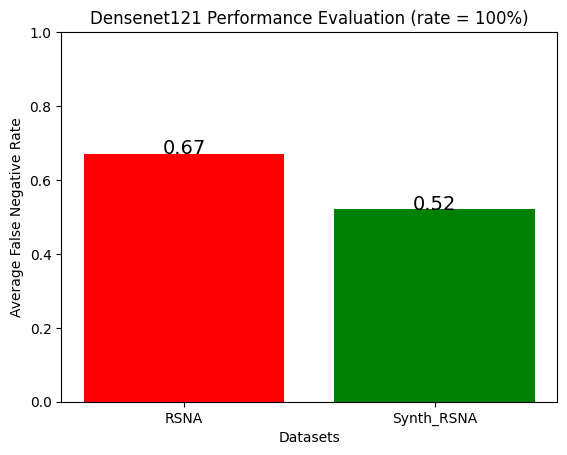

In [63]:
categories = ['RSNA', 'Synth_RSNA']
values = [0.67, 0.52]


# Create the bar graph
plt.bar(categories, values, color=['red', 'green'])
addlabels(categories, values)
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.ylabel('Average False Negative Rate');plt.xlabel('Datasets')
plt.ylim(0, 1.00) 
plt.title('Densenet121 Performance Evaluation (rate = 100%)')

# Show the plot
plt.show()

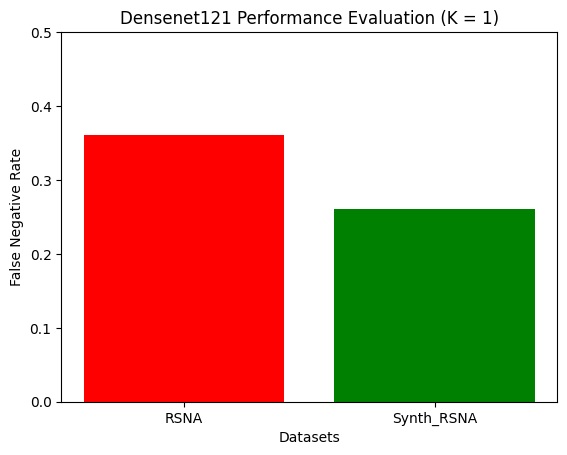

In [13]:
import matplotlib.pyplot as plt

categories = ['RSNA', 'Synth_RSNA']
values = [0.36, 0.26]


# Create the bar graph
plt.bar(categories, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.ylabel('False Negative Rate');plt.xlabel('Datasets')
plt.ylim(0, 0.5) 
plt.title('Densenet121 Performance Evaluation (K = 1)')

# Show the plot
plt.show()

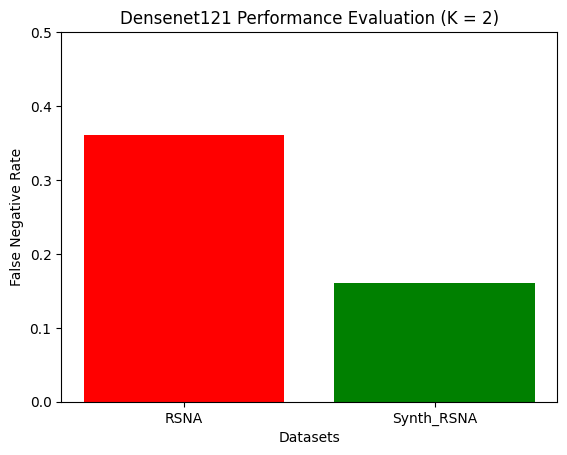

In [14]:
import matplotlib.pyplot as plt

categories = ['RSNA', 'Synth_RSNA']
values = [0.36, 0.16]


# Create the bar graph
plt.bar(categories, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.ylabel('False Negative Rate');plt.xlabel('Datasets')
plt.ylim(0, 0.5) 
plt.title('Densenet121 Performance Evaluation (K = 2)')

# Show the plot
plt.show()